In [352]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [353]:
#Simple harmonic oscillator

#Define a python function to calculate the exact (analytical) solution for x(t)
def analytical_SHO(t,x0,v0,k,m):
    return x0*np.cos(np.sqrt(k/m)*t) + (v0/(np.sqrt(k/m)))*np.sin(np.sqrt(k/m)*t)

1. timestep, $dt = 0.01$ sec
   
2. no. of timesteps, $n = 1000$
   
3. Initial conditions:
   * $x (t=0) = x_0$
   * $dx/dt (t=0) = v_0$
   * spring constant, $k$
   * mass, $m$
     
4. Algorithm: Position and velocity

    $x(t+dt) = x(t) + v(t)*dt$
   
    $v(t+dt) = v(t) + a(t)*dt$

5. Given,

    $a(t) = -\frac{k}{m}x(t)$

In [354]:
### Initialization
dt = 0.01
n = 1000
x0 = 0.
v0 = 1.
k = 1.
m = 1.

In [355]:
t = np.zeros(n, dtype=float)
# t

In [356]:
x = np.zeros(n, dtype=float)
v = np.zeros(n, dtype=float)

In [357]:
t[0]=0
t[1]=dt

#time
for i in range(2,n):
    t[i]=i*dt

In [358]:
#position and velocity (Euler formula):
x[0]=x0
v[0]=v0

for i in range(1,n):
    x[i]=x[i-1]+v[i-1]*dt
    v[i]=v[i-1]+(-k/m)*x[i-1]*dt

In [359]:
## modified Euler

x_me = np.zeros(n,dtype=float)
v_me = np.zeros(n,dtype=float)

x_me[0]=x0
v_me[0]=v0

for i in range(1,n):
    v_me[i]= v_me[i-1] +(-k/m)*x_me[i-1]*dt
    x_me[i]= x_me[i-1] + v_me[i]*dt

In [360]:
## Verlet 

x_ver = np.zeros(n,dtype=float)
v_ver = np.zeros(n,dtype=float)

x_ver[0]=x0
x_ver[1]=v0*dt

v_ver[0] = v0

for i in range(2,n):
    x_ver[i] = 2*x_ver[i-1] + (-k/m)*x_ver[i-1]*dt**2 - x_ver[i-2]
    v_ver[i-1] = (x_ver[i] - x_ver[i-2])/(2*dt)

In [361]:
x_analytical = analytical_SHO(t,x0,v0,k,m)

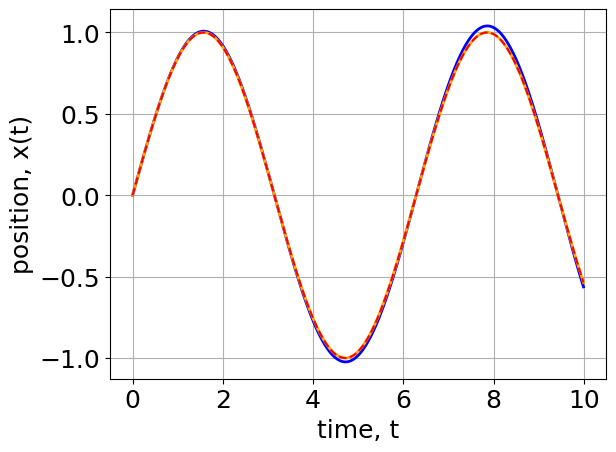

In [362]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.plot(t,x, 'b-', lw=2)
# ax.plot(t,x_me, ls='-', lw=2, color='orange')
ax.plot(t,x_ver, ls='-', lw=2, color='orange')
ax.plot(t,x_analytical, ls='--', lw=1.5, color='r')


# ax.plot(t,v, 'g-', lw=1.5)

ax.set_xlabel('time, t')
ax.set_ylabel('position, x(t)')
ax.grid(True)
plt.show()

In [363]:
error_e = x_analytical - x
error_me = x_analytical - x_me
error_ver = x_analytical - x_ver

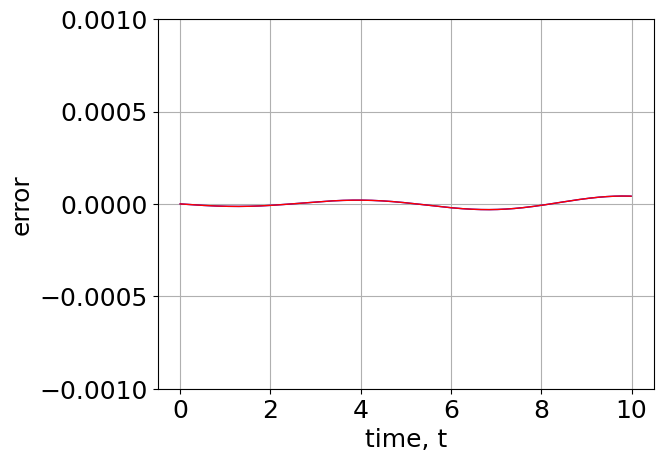

In [364]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

# ax.plot(t,error_e, 'k', lw=2)
ax.plot(t,error_me, 'b', lw=1)
ax.plot(t,error_ver, 'r', lw=1)

ax.set_ylim(-0.001,0.001)

ax.set_xlabel('time, t')
ax.set_ylabel('error')
ax.grid(True)
plt.show()

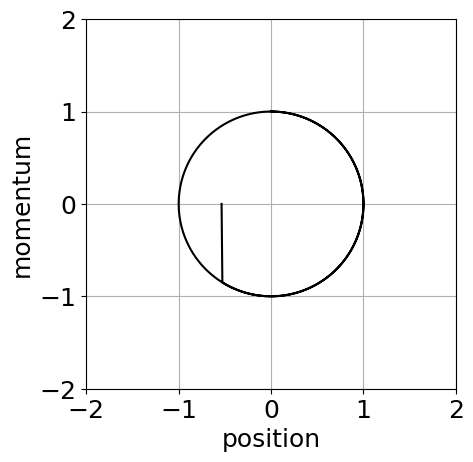

In [365]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.plot(x_ver,m*v_ver, 'k')

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

ax.set_xlabel('position')
ax.set_ylabel('momentum')

ax.set_box_aspect(1)

ax.grid(True)
plt.show()

In [366]:
### Euler

M_e = np.array([[1,dt], [-k/m*dt, 1]])
M_e

array([[ 1.  ,  0.01],
       [-0.01,  1.  ]])

In [367]:
eigenval_e, eigenvec_e = np.linalg.eig(M_e)

In [368]:
eigenval_e

array([1.+0.01j, 1.-0.01j])

In [369]:
M_me = np.array([[(1-k/m*dt**2), dt], [-k/m*dt, 1]])
M_me

array([[ 0.9999,  0.01  ],
       [-0.01  ,  1.    ]])

In [370]:
eigenval_me, eigenvec_me = np.linalg.eig(M_me)

In [371]:
eigenval_me

array([0.99995+0.00999987j, 0.99995-0.00999987j])

In [377]:
#Energy

potE = 0.5*k*x_ver**2
kinE = 0.5*m*v_ver**2
totE = potE + kinE

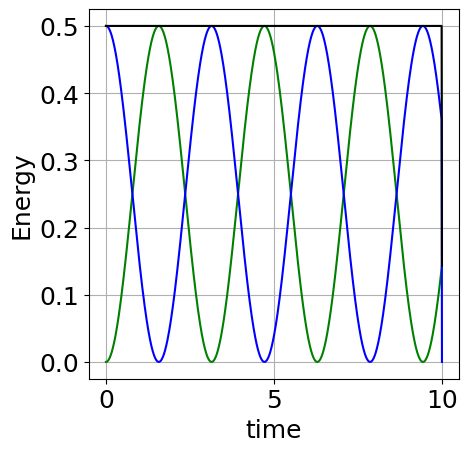

In [378]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.plot(t,potE, 'g-')
ax.plot(t,kinE, 'b-')
ax.plot(t,totE, 'k-')

ax.set_xlabel('time')
ax.set_ylabel('Energy')

ax.set_box_aspect(1)

ax.grid(True)
plt.show()